<a href="https://colab.research.google.com/github/athultr1997/AI/blob/master/01_Image_Classification_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting the version of tensorflow
Using tensorflow 2.x instead of the default tensorflow 1.x

In [0]:
%tensorflow_version 2.x

Checking if the correct version has been set

In [3]:
import tensorflow as tf
print(tf.__version__)

2.1.0-rc1


# Image Classification

In [0]:
# Auxiliary Libraries
import numpy as np
import matplotlib.pyplot as plt

### Import the MNIST dataset

In [21]:
mnist_dataset = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

### Understanding the data
The *train_images*, *train_labels*, *test_images*, *test_labels* are stored as numpy arrays. This is verified by displaying their shapes. Each image has a dimension of 28x28 pixels and each pixel value lies between 0 and 255.

In [26]:
print(len(train_images))

60000


In [24]:
print(train_images[0].shape)

(28, 28)


In [14]:
print(train_images.shape)

(60000, 28, 28)


In [11]:
print(train_labels.shape)

(60000,)


### Preprocessing the data

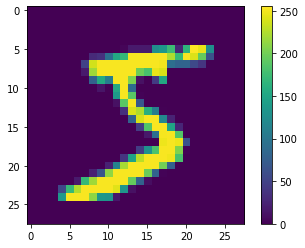

In [27]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

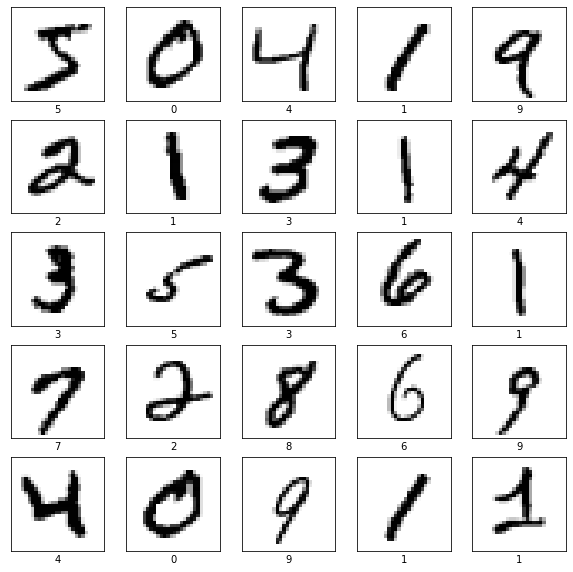

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[train_labels[i]])
plt.show()

### Building the Model

#### Setting up the Layers

In [0]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
        ])

####Compiling the Model

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the Model

In [33]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2608 - accuracy: 0.9264
Epoch 2/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1110 - accuracy: 0.9678
Epoch 3/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0764 - accuracy: 0.9772
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0570 - accuracy: 0.9824
Epoch 5/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0441 - accuracy: 0.9864
Epoch 6/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0351 - accuracy: 0.9892
Epoch 7/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0277 - accuracy: 0.9914
Epoch 8/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0223 - accuracy: 0.9931
Epoch 9/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0190 - accuracy: 0.9941
Epoch 10/10
60

### Test the Model

In [34]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

10000/10000 - 0s - loss: 0.0833 - accuracy: 0.9803

Test accuracy: 0.9803

Test loss: 0.08327314866403612


### Make Predictions

In [0]:
predictions = model.predict(test_images)

In [40]:
print(predictions[11])

[1.5342568e-09 1.1625634e-14 1.1550603e-09 4.2080163e-17 1.0692376e-11
 1.5040968e-07 9.9999964e-01 2.9925610e-16 1.8382589e-07 1.6462823e-15]


In [41]:
np.argmax(predictions[11])

6

In [42]:
print(test_labels[11])

6


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(labels[predicted_label],
                                100*np.max(predictions_array),
                                labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

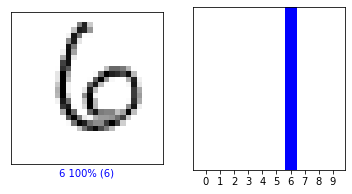

In [49]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

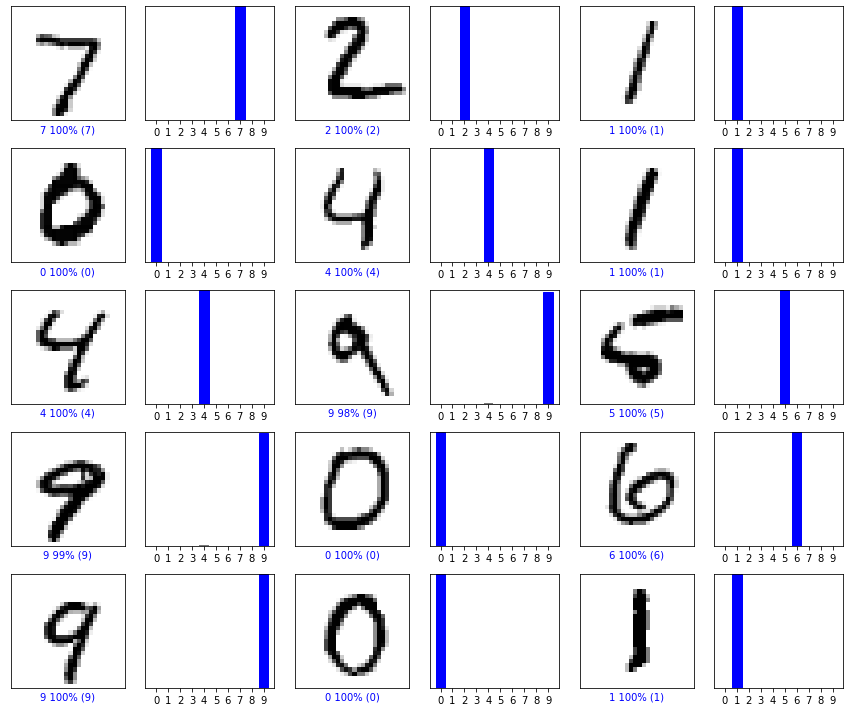

In [50]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()